In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.ensemble import IsolationForest
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [2]:
train = pd.read_csv(r'C:\Users\maker\Documents\Projects\Kaggle\BinaryMushroom\Data\train.csv', index_col="id")
test = pd.read_csv(r'C:\Users\maker\Documents\Projects\Kaggle\BinaryMushroom\Data\test.csv')

In [3]:
train.head(5)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
id,,,,,,,,,,,,,,,,,,,,,
0,e,8.80,f,s,u,f,a,c,w,4.51,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [4]:
# Check the shape of the data
print(train.shape)

(3116945, 21)


In [5]:
# Check info of the data

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3116945 entries, 0 to 3116944
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), object(18)
memory usage: 523.2+ MB


## Data Preprocessing

In [6]:
# null values

train.isnull().sum() / train.shape[0] * 100

class                    0.000000
cap-diameter             0.000128
cap-shape                0.001283
cap-surface             21.528227
cap-color                0.000385
does-bruise-or-bleed     0.000257
gill-attachment         16.809280
gill-spacing            40.373988
gill-color               0.001829
stem-height              0.000000
stem-width               0.000000
stem-root               88.452732
stem-surface            63.551362
stem-color               0.001219
veil-type               94.884350
veil-color              87.936970
has-ring                 0.000770
ring-type                4.134818
spore-print-color       91.425482
habitat                  0.001444
season                   0.000000
dtype: float64

In [8]:
cat_cols = [col for col in train.columns if train[col].dtype == 'object']
num_cols = [col for col in train.columns if train[col].dtype == 'float64']

cat_cols, num_cols

(['class',
  'cap-shape',
  'cap-surface',
  'cap-color',
  'does-bruise-or-bleed',
  'gill-attachment',
  'gill-spacing',
  'gill-color',
  'stem-root',
  'stem-surface',
  'stem-color',
  'veil-type',
  'veil-color',
  'has-ring',
  'ring-type',
  'spore-print-color',
  'habitat',
  'season'],
 ['cap-diameter', 'stem-height', 'stem-width'])

In [ ]:
# See the unique values in the categorical columns
for col in cat_cols:
    print(f"Unique values in {col} are {train[col].unique()}")

Unique values in class are ['e' 'p']
Unique values in cap-shape are ['f' 'x' 'p' 'b' 'o' 'c' 's' 'd' 'e' 'n' nan 'w' 'k' 'l' '19.29' '5 f' 't'
 'g' 'z' 'a' '2.85' '7 x' 'r' 'u' '3.55' 'is s' 'y' '4.22' '3.6' '21.56'
 'i' '6 x' '24.16' '8' 'm' 'ring-type' '10.13' 'is p' '7.43' 'h' '0.82'
 '10.46' '2.77' '2.94' '12.62' '5.15' '19.04' '4.97' '49.21' 'b f' '9.13'
 '1.66' '3.37' '7.21' '3.25' '11.12' '3 x' '4.3' '7.41' '6.21' '8.29'
 '54.78' '20.25' '3.52' '3.04' '2.63' '3.91' '6.44' '8.3' '7.6' '17.44'
 '4.33' '2.82' '6.53' '19.06']
Unique values in cap-surface are ['s' 'h' 'y' 'l' 't' 'e' 'g' nan 'd' 'i' 'w' 'k' '15.94' 'f' 'n' 'r' 'o'
 'a' 'u' 'z' '2.7' 'does l' '5.07' 'p' 'b' 'm' 'cap-diameter' '1.43' 'x'
 '7.14' 'c' 'is h' 'does t' '0.85' '6.57' '12.79' '6.45' '4.66' '23.18'
 '3.06' '16.39' '4.21' 'veil-color' '11.78' '8.1' 'has-ring' 'does h'
 '1.42' 'class' 'has h' 'does None' '10.83' 'season' '8.96' '14.04' '5.73'
 'is None' '24.38' '2.81' '0.88' '2.11' '2.79' 'ring-type'
 'does-bru

In [ ]:
# See the number of unique values in the categorical columnsb
for col in cat_cols:
    print(f"the number of unique values in {col} are {train[col].nunique()}")

the number of unique values in class are 2
the number of unique values in cap-shape are 74
the number of unique values in cap-surface are 83
the number of unique values in cap-color are 78
the number of unique values in does-bruise-or-bleed are 26
the number of unique values in gill-attachment are 78
the number of unique values in gill-spacing are 48
the number of unique values in gill-color are 63
the number of unique values in stem-root are 38
the number of unique values in stem-surface are 60
the number of unique values in stem-color are 59
the number of unique values in veil-type are 22
the number of unique values in veil-color are 24
the number of unique values in has-ring are 23
the number of unique values in ring-type are 40
the number of unique values in spore-print-color are 32
the number of unique values in habitat are 52
the number of unique values in season are 4


In [11]:
# Look at the top value counts in class

for col in cat_cols:
    print(f"Top value counts in {col} are {train[col].value_counts()}")

Top value counts in class are class
p    1705396
e    1411549
Name: count, dtype: int64
Top value counts in cap-shape are cap-shape
x        1436026
f         676238
s         365146
b         318646
o         108835
          ...   
17.44          1
4.33           1
2.82           1
6.53           1
19.06          1
Name: count, Length: 74, dtype: int64
Top value counts in cap-surface are cap-surface
t        460777
s        384970
y        327826
h        284460
g        263729
          ...  
10.34         1
10.1          1
1.08          1
is k          1
0.87          1
Name: count, Length: 83, dtype: int64
Top value counts in cap-color are cap-color
n        1359542
y         386627
w         379442
g         210825
e         197290
          ...   
20.02          1
20             1
25.98          1
8.67           1
9.02           1
Name: count, Length: 78, dtype: int64
Top value counts in does-bruise-or-bleed are does-bruise-or-bleed
f           2569743
t            547085
w     

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077964 entries, 0 to 2077963
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), int64(1), object(17)
memory usage: 332.9+ MB


In [13]:
# remove infrquent values in train

threshold = 70

for col in cat_cols:
    value_counts = train[col].value_counts()
    infrquent_values = value_counts[value_counts < threshold].index
    train[col] = train[col].replace(infrquent_values, 'unknown')
    print(f"Updated value counts in {col} are {train[col].value_counts().head(10)}")

Updated value counts in class are class
p    1705396
e    1411549
Name: count, dtype: int64
Updated value counts in cap-shape are cap-shape
x          1436026
f           676238
s           365146
b           318646
o           108835
p           106967
c           104520
unknown        527
Name: count, dtype: int64
Updated value counts in cap-surface are cap-surface
t    460777
s    384970
y    327826
h    284460
g    263729
d    206832
k    128875
e    119712
i    113440
w    109840
Name: count, dtype: int64
Updated value counts in cap-color are cap-color
n    1359542
y     386627
w     379442
g     210825
e     197290
o     178847
p      91838
r      78236
u      73172
b      61313
Name: count, dtype: int64
Updated value counts in does-bruise-or-bleed are does-bruise-or-bleed
f          2569743
t           547085
unknown        109
Name: count, dtype: int64
Updated value counts in gill-attachment are gill-attachment
a          646034
d          589236
x          360878
e          30

In [15]:
# remove infrequent values in test

for col in cat_cols:
    if col != 'class':
        values_counts = test[col].value_counts()
        infrequent_values = values_counts[values_counts < threshold].index
        test[col] = test[col].replace(infrequent_values, 'unknown')
        print(f"Updated value counts in {col} are {test[col].value_counts().head(10)}")

Updated value counts in cap-shape are cap-shape
x          957949
f          452360
s          242698
b          211879
o           71972
p           71302
c           69436
unknown       337
Name: count, dtype: int64
Updated value counts in cap-surface are cap-surface
t    306852
s    257190
y    218336
h    189737
g    176140
d    137675
k     86041
e     79918
i     75570
w     73109
Name: count, dtype: int64
Updated value counts in cap-color are cap-color
n    904307
y    259062
w    253844
g    140681
e    131524
o    119764
p     61186
r     51784
u     48865
b     40790
Name: count, dtype: int64
Updated value counts in does-bruise-or-bleed are does-bruise-or-bleed
f          1713662
t           364227
unknown         65
Name: count, dtype: int64
Updated value counts in gill-attachment are gill-attachment
a          430960
d          392584
x          240758
e          201276
s          196279
p          186334
f           79630
unknown       322
Name: count, dtype: int64
Updated

In [16]:
for col in cat_cols:
    print(col, " : ", train[col].isnull().sum() / train.shape[0] * 100)

class  :  0.0
cap-shape  :  0.0012833078543253089
cap-surface  :  21.528227158323293
cap-color  :  0.0003849923562975927
does-bruise-or-bleed  :  0.00025666157086506175
gill-attachment  :  16.809279599094626
gill-spacing  :  40.373987991446754
gill-color  :  0.0018287136924135651
stem-root  :  88.45273176138816
stem-surface  :  63.55136199066715
stem-color  :  0.0012191424616090434
veil-type  :  94.88434990030302
veil-color  :  87.93697033473481
has-ring  :  0.0007699847125951854
ring-type  :  4.134817906636145
spore-print-color  :  91.42548232323637
habitat  :  0.0014437213361159725
season  :  0.0


In [17]:
# Get rid of columns that have excessive null values (>60)
drop_columns = ["stem-root", "stem-surface", "veil-type", "veil-color", "spore-print-color"]

train = train.drop(columns=drop_columns)
test = test.drop(columns=drop_columns)

In [18]:
cat_cols = [col for col in train.columns if train[col].dtype == 'object']

for column in cat_cols:
    train[column].fillna(train[column].mode().iloc[0], inplace=True)

for column in cat_cols:
    if column != 'class':
        test[column].fillna(test[column].mode().iloc[0], inplace=True)

for col in cat_cols:
    if col != "class":
        print(col, " : ", train[col].isnull().sum() / train.shape[0] * 100)

C:\Users\maker\AppData\Local\Temp\ipykernel_16400\392272657.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[column].fillna(train[column].mode().iloc[0], inplace=True)
C:\Users\maker\AppData\Local\Temp\ipykernel_16400\392272657.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

cap-shape  :  0.0
cap-surface  :  0.0
cap-color  :  0.0
does-bruise-or-bleed  :  0.0
gill-attachment  :  0.0
gill-spacing  :  0.0
gill-color  :  0.0
stem-color  :  0.0
has-ring  :  0.0
ring-type  :  0.0
habitat  :  0.0
season  :  0.0


In [19]:
train_df = train[~train.isin(['unknown']).any(axis=1)]
test_df = test[~test.isin(['unknown']).any(axis=1)]

In [20]:
for column in cat_cols:
    print(f'Top value counts in {column} are {train_df[column].value_counts()}')

Top value counts in class are class
p    1703384
e    1410013
Name: count, dtype: int64
Top value counts in cap-shape are cap-shape
x    1434694
f     675488
s     364835
b     318330
o     108775
p     106832
c     104443
Name: count, dtype: int64
Top value counts in cap-surface are cap-surface
t    1130743
s     384499
y     327374
h     284141
g     263578
d     206634
k     128778
e     119582
i     113298
w     109764
l      44835
n         96
f         75
Name: count, dtype: int64
Top value counts in cap-color are cap-color
n    1358254
y     386203
w     379004
g     210638
e     197113
o     178670
p      91774
r      78067
u      73093
b      61256
k      59825
l      39500
Name: count, dtype: int64
Top value counts in does-bruise-or-bleed are does-bruise-or-bleed
f    2566901
t     546496
Name: count, dtype: int64
Top value counts in gill-attachment are gill-attachment
a    1168764
d     588693
x     360529
e     301438
s     295105
p     278891
f     119903
c         74
Name

# Clean Numerical

In [21]:
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
test_df.replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\maker\AppData\Local\Temp\ipykernel_16400\1611571774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\maker\AppData\Local\Temp\ipykernel_16400\1611571774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [22]:
for col in num_cols:
    print(col, " : ", train_df[col].isnull().sum())

cap-diameter  :  4
stem-height  :  0
stem-width  :  0


In [23]:
for col in num_cols:
    print(col, " : ",test_df[col].isnull().sum())

cap-diameter  :  7
stem-height  :  1
stem-width  :  0


In [24]:
for column in num_cols:
    train_df[column].fillna(train_df[column].mean(), inplace=True)

for column in num_cols:
    test_df[column].fillna(test_df[column].mean(), inplace=True)

C:\Users\maker\AppData\Local\Temp\ipykernel_16400\2682688151.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[column].fillna(train_df[column].mean(), inplace=True)
C:\Users\maker\AppData\Local\Temp\ipykernel_16400\2682688151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[column].fillna(train_df[column].mean(), inplace

## EDA

         class      Ratio
class                    
p      1703384  54.711429
e      1410013  45.288571


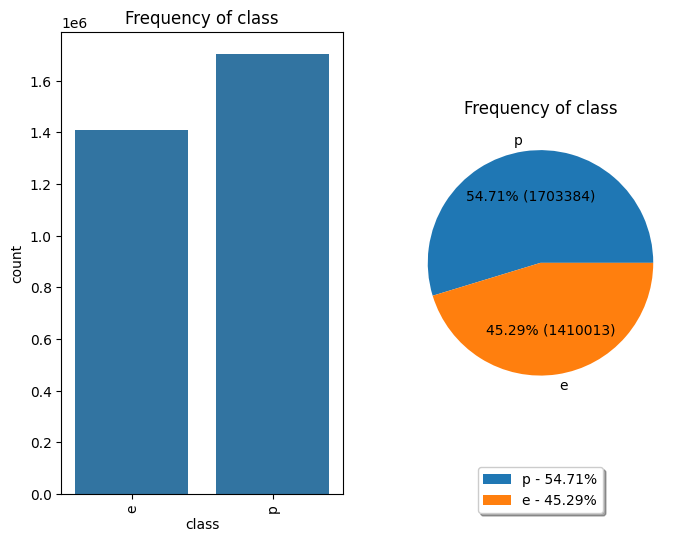

           cap-shape      Ratio
cap-shape                      
x            1434694  46.081306
f             675488  21.696173
s             364835  11.718229
b             318330  10.224523
o             108775   3.493772
p             106832   3.431365
c             104443   3.354632


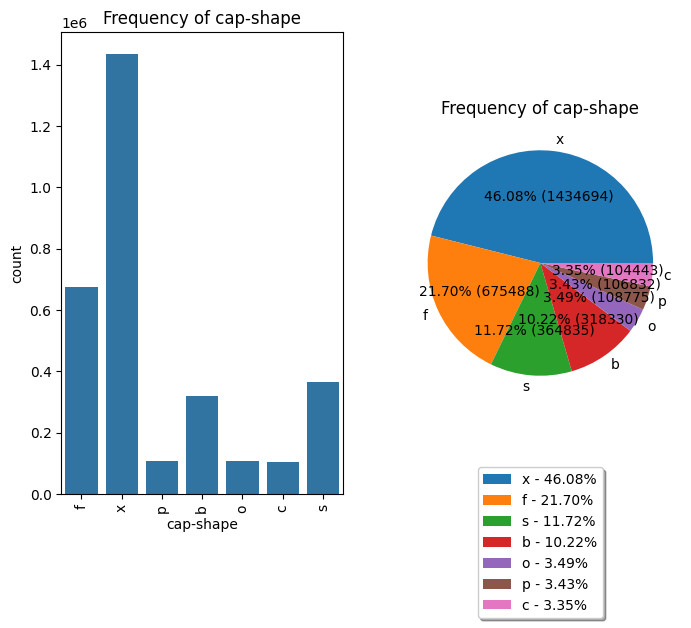

             cap-surface      Ratio
cap-surface                        
t                1130743  36.318626
s                 384499  12.349822
y                 327374  10.515010
h                 284141   9.126398
g                 263578   8.465930
d                 206634   6.636931
k                 128778   4.136254
e                 119582   3.840885
i                 113298   3.639048
w                 109764   3.525538
l                  44835   1.440067
n                     96   0.003083
f                     75   0.002409


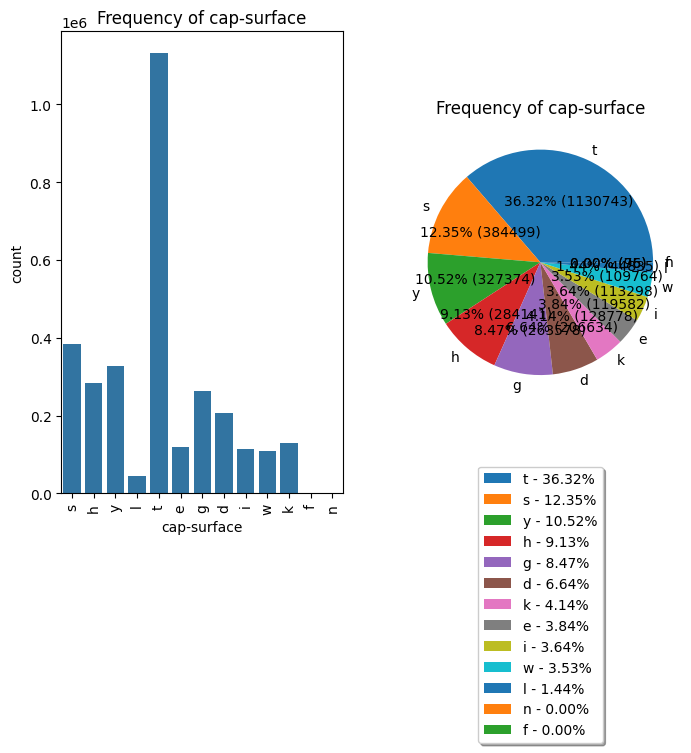

           cap-color      Ratio
cap-color                      
n            1358254  43.626110
y             386203  12.404554
w             379004  12.173327
g             210638   6.765536
e             197113   6.331123
o             178670   5.738748
p              91774   2.947713
r              78067   2.507454
u              73093   2.347693
b              61256   1.967497
k              59825   1.921535
l              39500   1.268711


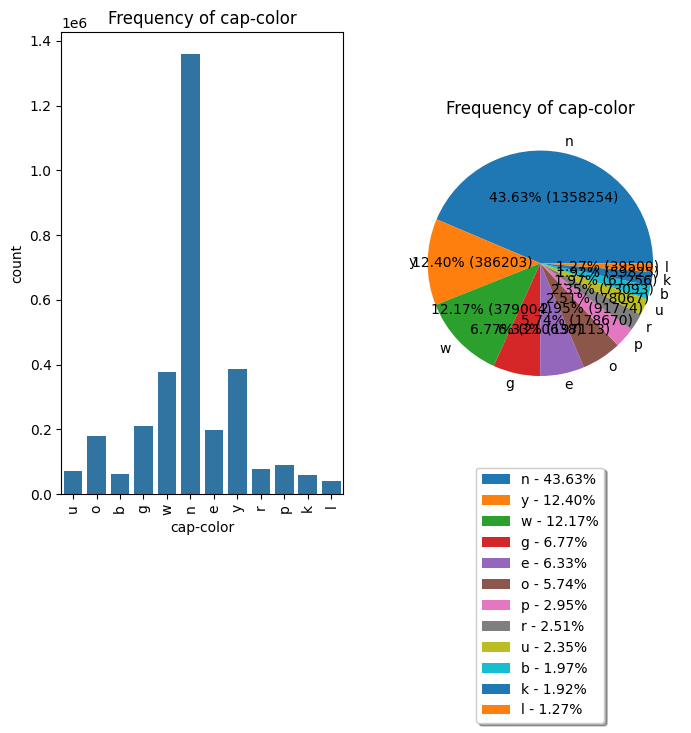

                      does-bruise-or-bleed      Ratio
does-bruise-or-bleed                                 
f                                  2566901  82.446954
t                                   546496  17.553046


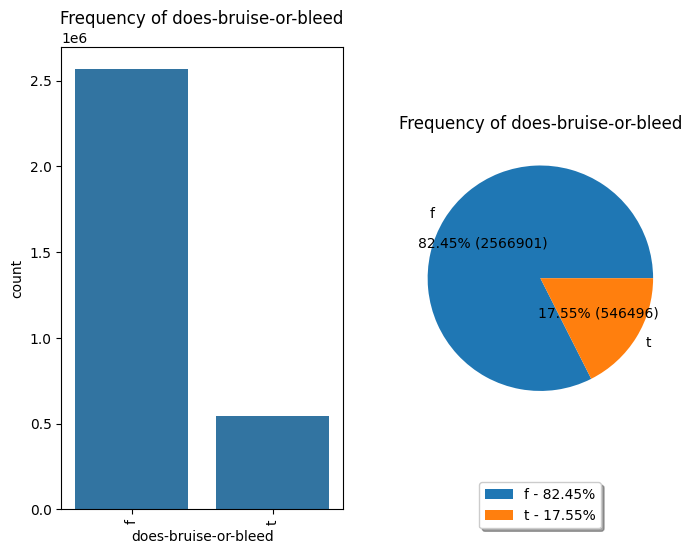

                 gill-attachment      Ratio
gill-attachment                            
a                        1168764  37.539832
d                         588693  18.908382
x                         360529  11.579924
e                         301438   9.681965
s                         295105   9.478553
p                         278891   8.957772
f                         119903   3.851195
c                             74   0.002377


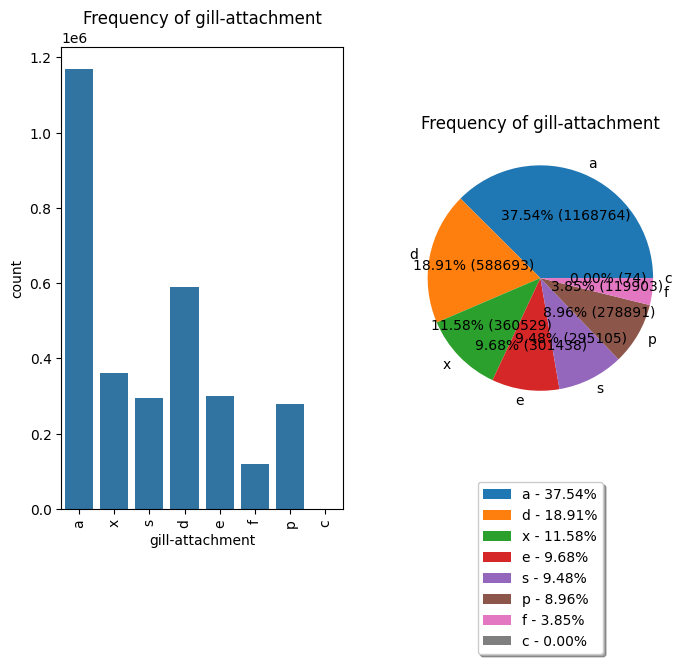

              gill-spacing      Ratio
gill-spacing                         
c                  2586542  83.077809
d                   407528  13.089497
f                   119327   3.832695


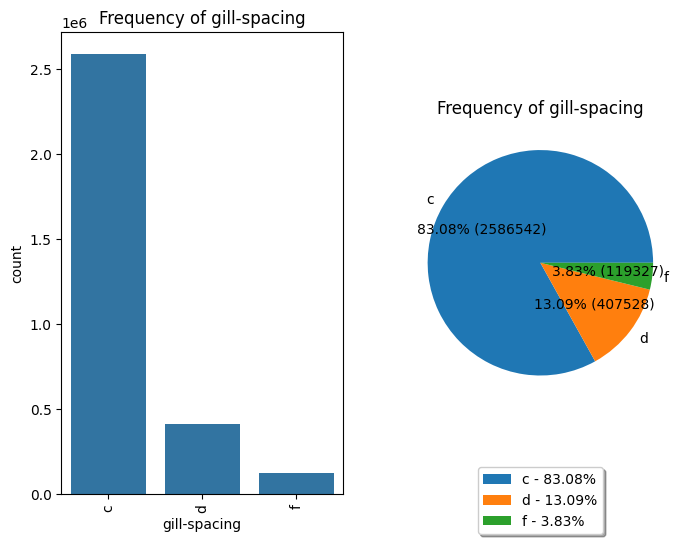

            gill-color      Ratio
gill-color                       
w               930624  29.890952
n               542811  17.434686
y               469012  15.064317
p               343331  11.027537
g               211939   6.807323
o               156973   5.041856
k               127815   4.105323
f               119638   3.842684
r                62714   2.014327
e                55998   1.798614
b                47193   1.515804
u                45349   1.456576


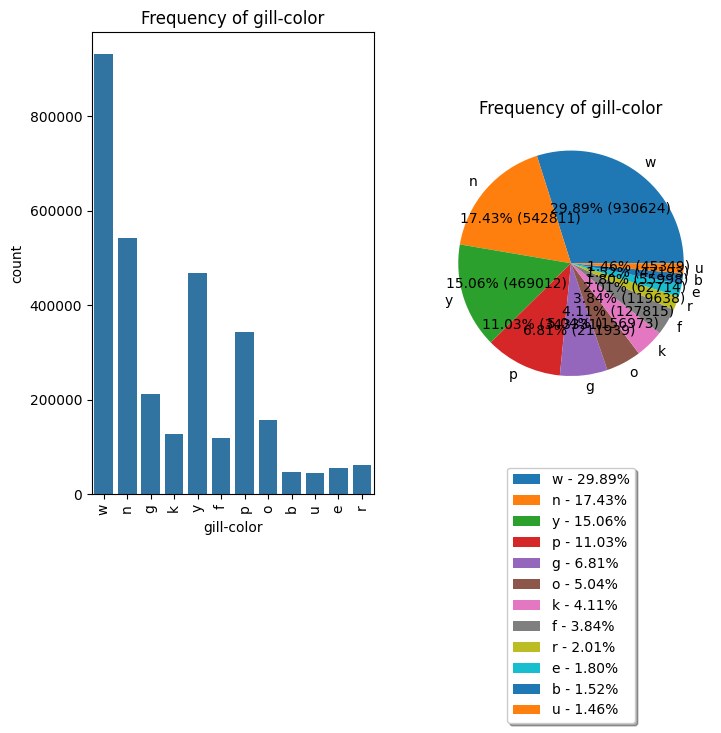

            stem-color      Ratio
stem-color                       
w              1195301  38.392181
n              1002495  32.199395
y               373579  11.999080
g               131918   4.237108
o               111432   3.579113
e               103310   3.318240
u                66902   2.148843
p                54660   1.755639
k                33644   1.080620
r                22272   0.715360
l                 9956   0.319779
b                 7356   0.236269
f                  572   0.018372


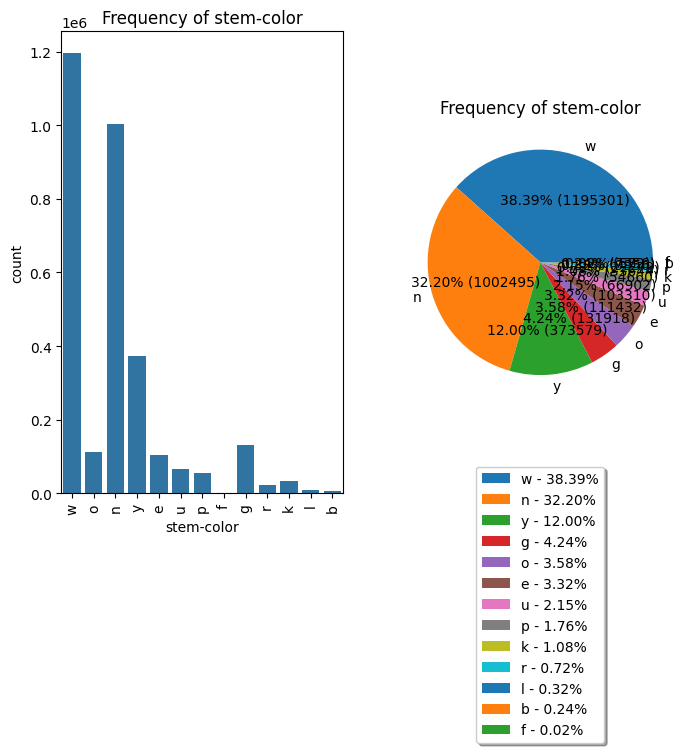

          has-ring      Ratio
has-ring                     
f          2366507  76.010448
t           746890  23.989552


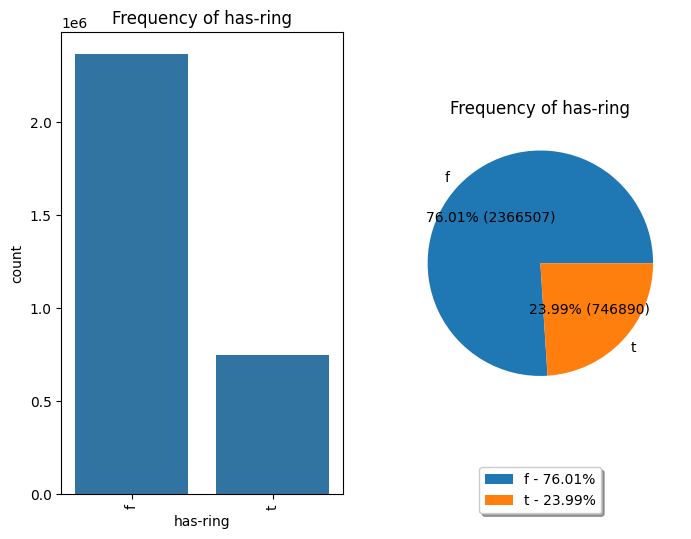

           ring-type      Ratio
ring-type                      
f            2603512  83.622872
e             119762   3.846667
z             113631   3.649743
l              73351   2.355980
r              67804   2.177814
p              67616   2.171776
g              63648   2.044327
m               3975   0.127674
t                 98   0.003148


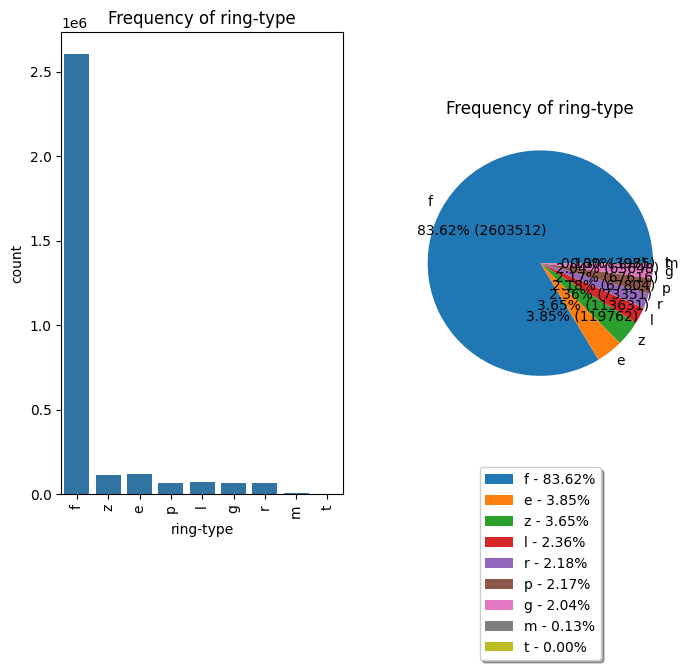

         habitat      Ratio
habitat                    
d        2175447  69.873742
g         454484  14.597689
l         171755   5.516643
m         150734   4.841464
h         120060   3.856238
w          18507   0.594431
p          17157   0.551070
u           5253   0.168722


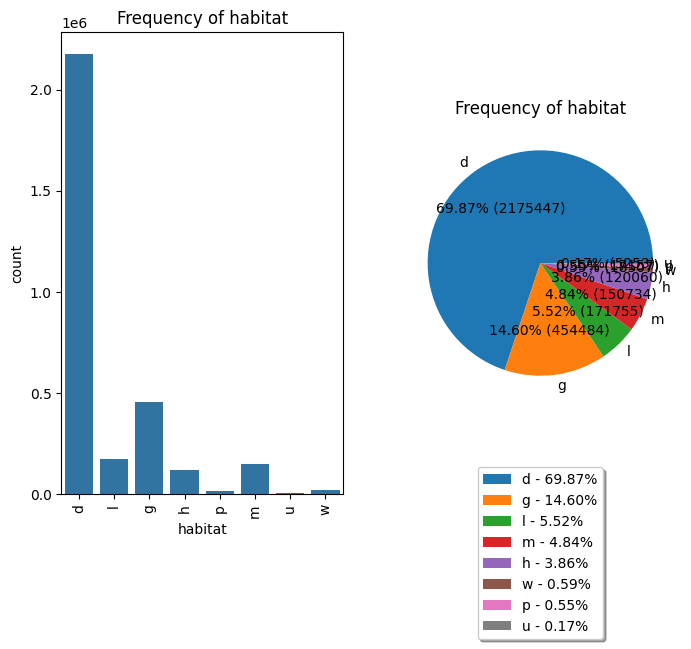

         season      Ratio
season                    
a       1541503  49.511932
u       1152242  37.009158
w        277933   8.927002
s        141719   4.551909


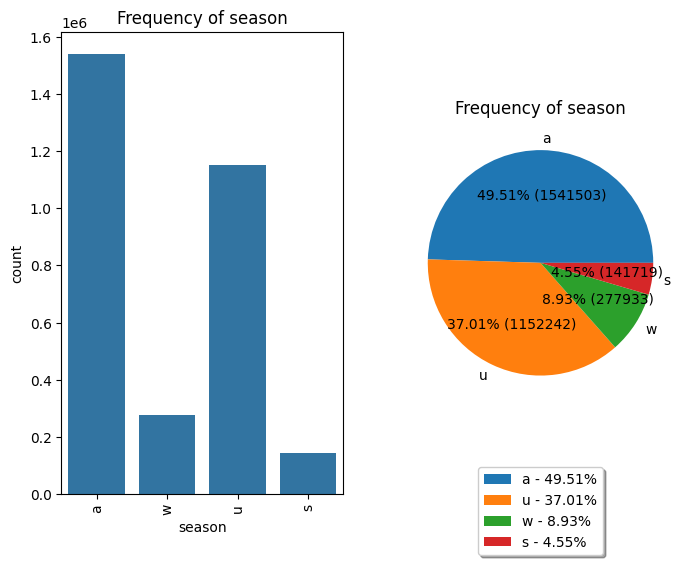

In [28]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(), "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        fig, axs = plt.subplots(1,2, figsize=(8,6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data = dataframe)
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, (p/100)*values.sum()))
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)], loc="upper center", bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(train_df, col, plot=True)

In [31]:
def myDistPlot(df, col, ax):
    sns.histplot(df[col], ax=ax)
    ax.set_title(f"Distribution of {col}")

def myBoxPlot(df, col, ax):
    sns.boxplot(df[col], ax=ax)
    ax.set_title(f"Boxplot of {col}")

# Matrix Plots
def myHeatMap(df, size):
    if size: plt.figure(figsize=size)
    sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap="Blues", annot_kws={"size": 12})
    plt.title('Correlation Heatmap')
    plt.show()

def myVSPlot(df, normal_col, label_col):
    plt.figure(figsize=(10,6), dpi=80)
    plt.bar(list(dict(df[normal_col].value_counts()).keys()), dict(df[normal_col].value_counts()).values(), color='r')
    plt.bar(list(dict(df[df[label_col] == 1][normal_col].value_counts()).keys()), dict(df[df[label_col] == 1][normal_col].value_counts()).values(), color='b')

    plt.xlabel(normal_col)
    plt.ylabel('Count')
    plt.legend(['All', label_col])

def plot_charts_grid_simple_feature(df, plot_func, size=(12, 4), n_col=1):
    if len(df.columns) == 0:
        return
    n_rows = (len(df.columns) + n_col -1) // n_col
    fig, axes = plt.subplots(n_rows, n_col, figsize=(size[0]*n_col, size[1]*n_rows))
    if len(df.columns) == 1:
        axes = np.array([axes])
    axes = axes.flatten()
    for i, label in enumerate(df.columns):
        plot_func(df, label, axes[i])
        axes[i].set_xlabel(label)

    for j in range(i+1, n_rows*n_col):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

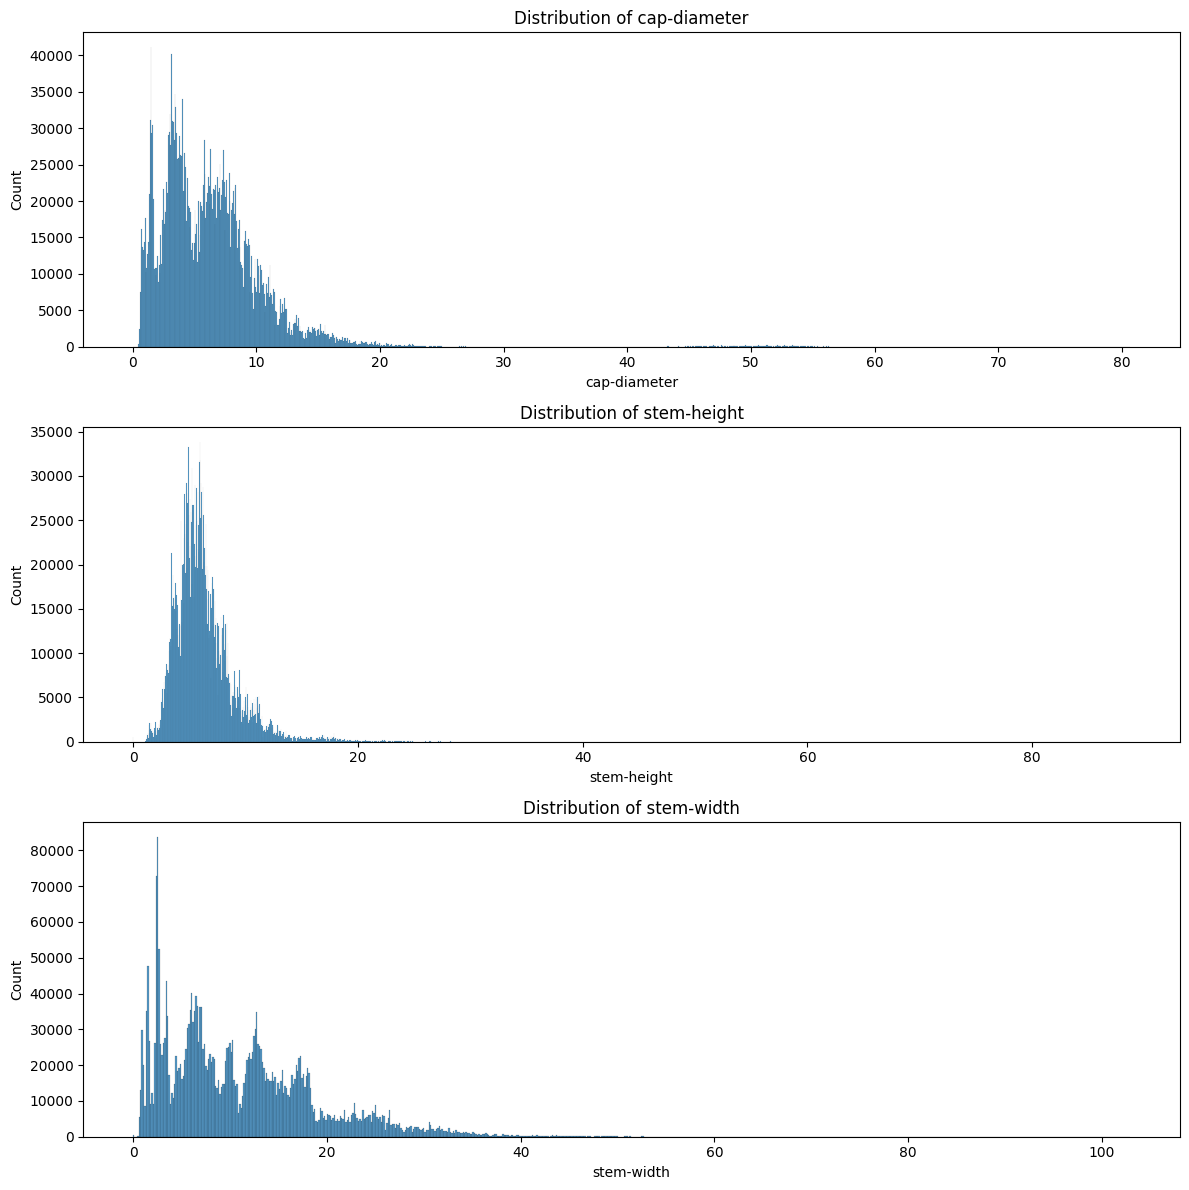

In [32]:
plot_charts_grid_simple_feature(train_df[num_cols], myDistPlot)

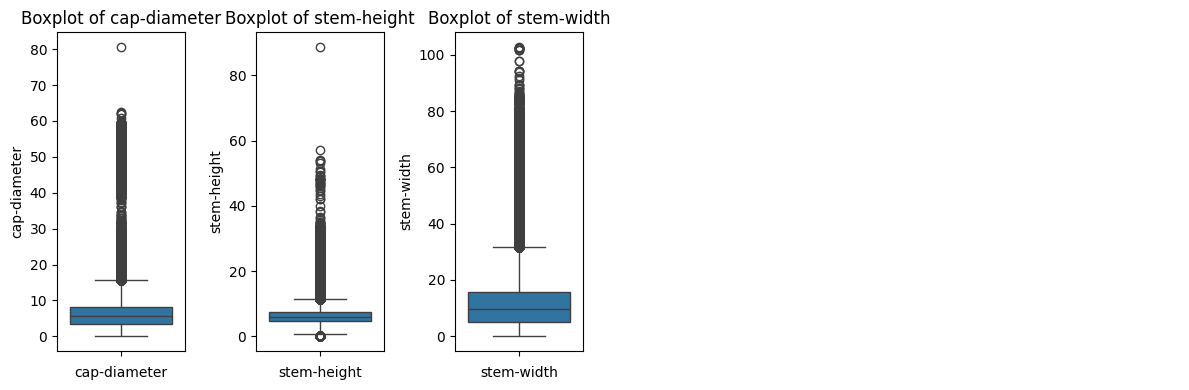

In [33]:
plot_charts_grid_simple_feature(train_df[num_cols], myBoxPlot, size=(2,4), n_col=6)

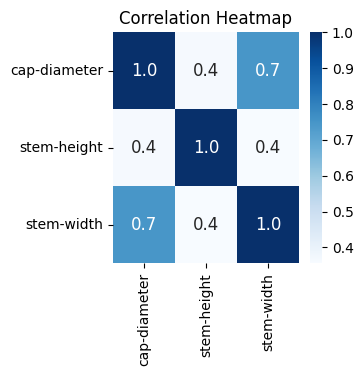

In [34]:
n_numeric_cols = len(train_df.select_dtypes(include=[np.number]).columns) // 3 * 2
myHeatMap(train_df.select_dtypes(include=[np.number]), size=(n_numeric_cols+1, n_numeric_cols+1))

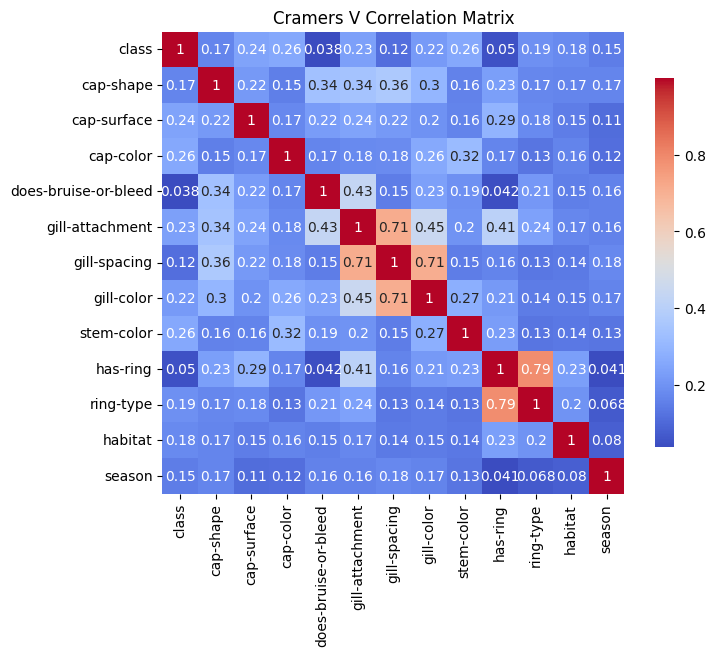

In [35]:
from scipy.stats import chi2_contingency

# Function to calculate Cramers V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r -1)) / (n-1))
    rcorr = r -1
    kcorr = k - 1
    return np.sqrt(phi2corr / min((kcorr, rcorr)))

corr_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        corr_matrix.loc[col1, col2] = cramers_v(train_df[col1], train_df[col2])


# Convert the correlation matrix to numeric
corr_matrix = corr_matrix.astype(float)

# Create a heatmap to visualise the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Cramers V Correlation Matrix")
plt.show()

## Encoding

In [42]:
encoder = LabelEncoder()

# encode all categorical columns
for col in train_df.select_dtypes(include=['object']).columns:
    train_df[col] = encoder.fit_transform(train_df[col])

C:\Users\maker\AppData\Local\Temp\ipykernel_16400\2086043142.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col] = encoder.fit_transform(train_df[col])
C:\Users\maker\AppData\Local\Temp\ipykernel_16400\2086043142.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col] = encoder.fit_transform(train_df[col])
C:\Users\maker\AppData\Local\Temp\ipykernel_16400\2086043142.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [43]:
X = train_df.drop(columns=['class'], axis=1)
y = train_df['class']

In [45]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## ML

In [47]:
%%time

isolation_forest = IsolationForest(contamination=0.024, random_state=42)
outlier_labels = isolation_forest.fit_predict(X_train)

non_outliers_mask = outlier_labels != -1
X_train = X_train[non_outliers_mask]
y_train = y_train[non_outliers_mask]

CPU times: total: 18.4 s
Wall time: 18.4 s


In [49]:
%%time

xgb_params = {
    'colsample_bytree': [0.5],
    'learning_rate': [0.1, 0.05],
    'max_depth': [5, 10, 15],
    'min_child_weight': [1, 5, 10],
    'n_estimators': [100, 200, 500],
    'subsample': [0.5, 0.7, 0.9],
}

skf = StratifiedKFold(n_splits=3)

xgb = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=xgb_params, cv=skf, n_jobs=4)

xgb_model = xgb.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
accuracy_score(y_test, xgb_pred)

CPU times: total: 8min 19s
Wall time: 1h 44min 27s


0.9912137855720434